# Lab 2 - Pichu or Pikachu?

## Opening and Cleaning the Datasets

- In this lab I will create two different models (based on the closest point and the five closest points) to identify if a Pokémon is a Pichu or a Pikachu, based on its' width and height.
- I start with creating a function to clean the dataset (the Pichu and the Pikachu datasets have the same format).
- After that I will open the datasets and clean them using the clean_text function.

In [86]:
import matplotlib.pyplot as plt
import random as rnd
from math import sqrt

In [87]:
def clean_text(pokemon_file, pokemon_type):
    '''The function takes a textfile and the pokemon type (as a string) as parameters.
    The textfile must have the following heading: (width (cm), height (cm)).
    Each line should look similar to: (20.11541438766307, 28.701809671168824).
    The function returns a list of lists, where each of the inner lists consists of two float values,
    where the first value is the width and the second value is the height.'''
    pokemon_size = [pokemon.strip("\n") for pokemon in pokemon_file.readlines()] #readlines reads each line in the textfile and stores each line as a string element in a list. strip("\n") removes "\n" (that automatically gets added when running readlines) for each line. 
    pokemon_size.remove("(width (cm), height (cm))") #Removes the heading
    pokemon_size = [pokemon.replace("(","").replace(")", "") for pokemon in pokemon_size] #For each element, replace the left and right paranthesis with an empty string "" (i.e. remove it).
    pokemon_size = [pokemon.split(",") for pokemon in pokemon_size] #split(",") creates inner lists of the strings in the larger list (separated at comma). Each inner list contains the values width and height. 
    pokemon_size = [[float(pokemon[0]), float(pokemon[1]), pokemon_type] for pokemon in pokemon_size] #Changes the first (width) and second (height) elements in each inner list in pokemon_size to floats and adds information about the type of Pokémon.  
    return pokemon_size

In [88]:
with open("pichu.txt", "r") as pichu, open("pikachu.txt", "r") as pikachu:
    #Reading, cleaning and joining together the datasets
    pichu_size = clean_text(pichu, "pichu")
    pikachu_size = clean_text(pikachu, "pikachu") 
    pokemons = pichu_size + pikachu_size
    print(len(pokemons))

    #Creates the variables width and height for Pichu and Pikachu, by calling the first and second elements. 
    #These variables will only be used when plotting the data
    pichu_width = [pichu[0] for pichu in pichu_size] 
    pichu_height = [pichu[1] for pichu in pichu_size] 
    pikachu_width = [pikachu[0] for pikachu in pikachu_size] 
    pikachu_height = [pikachu[1] for pikachu in pikachu_size]
    print(len(pichu_width), len(pichu_height), len(pikachu_width), len(pikachu_height))

100
50 50 50 50


## Plotting the Data
- I will use matplotlib to plot the data.
- Studying the scatterplot, I can see that the Pichu and Pikachu datapoints are separated from each other on the y-axis (height), but that they overlap on the x-axis (width).

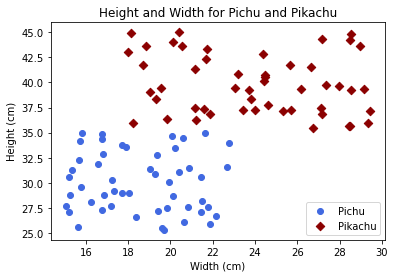

In [89]:
#Creating a scatterplot
plt.scatter(pichu_width, pichu_height, c="royalblue", label="Pichu") #Plots the values for Pichu, changes the colour and adds a label (that will be added to the plot when running legend())
plt.scatter(pikachu_width, pikachu_height, c="darkred", marker="D", label="Pikachu") #marker="D" changes the markers to diamonds
plt.legend() #Creates a legend, based on the labels. https://www.kite.com/python/answers/how-to-add-a-legend-to-a-matplotlib-plot-in-python
plt.ylabel("Height (cm)")
plt.xlabel("Width (cm)")
_ = plt.title("Height and Width for Pichu and Pikachu") #Assigning the title to a variable disables the output. https://stackoverflow.com/questions/12056115/disable-the-output-of-matplotlib-pyplot

## Opening and Cleaning the Test Data
- The testdata consist of four testpoints ((25, 35), (15,14), (26,30), (22,45)).
- The testdata has a different file structure and can therefore not be cleaned with the clean_text function.

In [90]:
with open("test_points.txt", "r") as test:
    test_points = test.readlines() #readlines reads the line in the textfile and stores it as a string element in a list.
    test_points = test_points[0].split(")") #Splits the only element (element 0) in the list at closing paranthesis.
    test_points = [point.replace(", (", "").replace("(", "") for point in test_points] #replace(", (", "") replaces comma-space-openining_paranthesis with an empty string and replace("(", "") replaces a single paranthesis with an empty string.  
    test_points = [point.split(",") for point in test_points] #split(",") creates inner lists out of all of the string elements in the larger list (splitted at comma). Each inner list contains the values width and height. 
    test_points.pop(4) #pop(4) removes the fifth element in the list of lists, which is empty.
    test_points = [[float(point[0]), float(point[1])] for point in test_points] #Changes the first (width) and second (height) elements in each inner list in test_points to floats.  
    print(test_points)

[[25.0, 35.0], [15.0, 14.0], [26.0, 30.0], [22.0, 45.0]]


## Creating Euclidean Distance Function

- I create a euclidean distance function, which can be used to calculate the distance between two points (the test point and a point in the dataset).

In [91]:
def eucl_dist(x1, y1, x2, y2):
    '''The function takes the coordinates (x, y) of two points as input.
    The function returns the euclidean distance between the points.'''
    return sqrt((x2 - x1)**2 + (y2-y1)**2)

## Creating a Function for Testing if a Pokémon is a Pichu or a Pikachu

- This function is based on the point that is closest to the test point.
- If the closest point is classified as a Pikachu, the test point will be classified as a Pikachu.
- If the closest point is classified as a Pichu, the test point will be classified as a Pichu.

In [92]:
def pichu_or_pikachu_closest(test_point, dataset, prints=True):
    '''The function takes a point (stored in a list consisting of the x (width) and y (height)-coordinates) and a dataset as parameters.
    It sets the default value of prints to True.
    The function checks what kind of Pokémon that is closest to the test point given as an argument.
    Based on the closest point, the function classifies the test point as either a Pichu or a Pikachu.'''
    distances = [[eucl_dist(test_point[0], test_point[1], point[0], point[1]), point[2]] for point in dataset] #Creates a list of lists, where each inner list contains the euclidean distance, between the test point and a point in the dataset, and the type of Pokémon.
    distances.sort() #Sorts the list of distances, so that the lowest value (i.e. closest point) is the first element in the list.
    if distances[0][1] == "pichu": #If the first element in the list is Pichu. 
        if prints: #If prints is True/has not been set to False (which can be useful when running the function multiple times to calculate accuracy)
            print(f"Sample with (width, height): ({test_point[0]:.1f}, {test_point[1]:.1f}) classified as Pichu.")
        return "pichu"
    else:
        if prints:
            print(f"Sample with (width, height): ({test_point[0]:.1f}, {test_point[1]:.1f}) classified as Pikachu.")
        return "pikachu"

## Classifying the Test Points (based on the closest point) and Plotting Them

- On the plot we can see that three out of four test points are surrounded by the Pokémons that they were classified as.
- Based on a visual inspection, two points are outliers and the (26, 30) point is close to both Pichus and Pikachus, but were classified as a Pichu (please note that the scale of the plot makes it look like that the point is closer to Pikachus.)

In [93]:
#Loops through the list of lists of test points and classifies each point as either Pichu or Pikachu.
for point in test_points:
    pichu_or_pikachu_closest(point, pokemons)

Sample with (width, height): (25.0, 35.0) classified as Pikachu.
Sample with (width, height): (15.0, 14.0) classified as Pichu.
Sample with (width, height): (26.0, 30.0) classified as Pichu.
Sample with (width, height): (22.0, 45.0) classified as Pikachu.


In [94]:
#This code will create four variables: width and height for the predicted Pikachu and Pichu respectively. 
#These variables will only be used when adding the test points to a scatterplot.
pichu_test_width, pichu_test_height, pikachu_test_width, pikachu_test_height = [], [], [], []
for point in test_points:
    if pichu_or_pikachu_closest(point, pokemons, prints=False) == "pichu": #If the function returns "pichu".
        pichu_test_width.append(point[0]) 
        pichu_test_height.append(point[1])
    else:
        pikachu_test_width.append(point[0])
        pikachu_test_height.append(point[1])

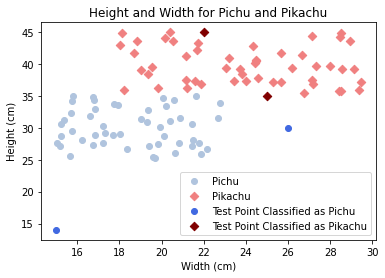

In [95]:
#Creating a scatterplot, where the test points are included
plt.scatter(pichu_width, pichu_height, c="lightsteelblue", label="Pichu") 
plt.scatter(pikachu_width, pikachu_height, c="lightcoral", marker="D", label="Pikachu") 
plt.scatter(pichu_test_width, pichu_test_height, c="royalblue", label="Test Point Classified as Pichu") #Adds two points predicted as Pichu, plotted in a darker blue.
plt.scatter(pikachu_test_width, pikachu_test_height, c="maroon", marker="D", label="Test Point Classified as Pikachu") #Adds two points predicted as Pikachu, plotted in a darker red.
plt.legend() 
plt.ylabel("Height (cm)")
plt.xlabel("Width (cm)")
_ = plt.title("Height and Width for Pichu and Pikachu") 

## Creating a Program Where the User Can Input a Test Point

- The program is based on the closest point function

In [96]:
#Run the following loop until the user's input is correct; then call the function and break the loop.
while True:
    width = input("Please enter the width of the Pokémon.")
    height = input("Please enter the height of the Pokémon.")
    try: 
        #If the user has only inputed letters, this code raises an error.
        if width.isalpha() or height.isalpha():
            raise ValueError("Please make sure that you only enter numerical values.")
        
        #Fixes some common input errors (removes empty spaces at the beginning and end and changes comma to decimal separator), and changes the values to floats.
        width = float(".".join(width.strip().split(","))) 
        height = float(".".join(height.strip().split(",")))

        #If the user has inputed 0 or a negative number, this code raises an error.
        if width <= 0 or height <= 0: 
            raise ValueError("Both the width and height has to be larger than 0.")
        
        #Creates a list of the width and height and runs the function for classifying if the Pokémon is a Pichu or a Pikachu.
        pichu_or_pikachu_closest([width, height], pokemons)
        break
       
    except ValueError as err:
        print(err)

Sample with (width, height): (55.0, 44.0) classified as Pikachu.


## Creating a Second Function for Classifying if a Pokémon is a Pichu or a Pikachu

- This function is based on the five closest points to the test point.
- If the majority of the five closest points are Pichus, the test point will be classified as a Pichu.
- If the majority of the five closest points are Pikachus, the test point will be classified as a Pikachu.

In [97]:
def pichu_or_pikachu_five_closest(test_point, dataset, prints=True):
    '''The function takes a point (stored in a list consisting of the x (width) and y (height)-coordinates) and a dataset as parameters.
    It sets the default value of prints to True.
    The function checks the types of Pokémons at the five closest points.
    Based on the most common type of Pokémon, it classifies the test point as either a Pichu or a Pikachu.'''
    distances = [[eucl_dist(test_point[0], test_point[1], point[0], point[1]), point[2]] for point in dataset] #Creates a list of lists, where each inner list contains the euclidean distance and the type of Pokémon.
    distances.sort() #Sorts the list of distances, so that the lowest value (i.e. closest point) is the first element in the list.

    pichus_pikachus = [pokemon[1] for pokemon in distances[0:5]] #Adds the type of Pokémon, for the five lowest values, to a list.
    pichu_count = pichus_pikachus.count("pichu") #Counts the number of Pichus at the five closest points.
    pikachu_count = pichus_pikachus.count("pikachu") #Counts the number of Pikachus at the five closest points.

    if pichu_count > pikachu_count: #If the five closest points contain more Pichus than Pikachus.
        if prints: #If prints is True/has not been set to False (which can be useful when running the function multiple times to calculate accuracy)
            print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) classified as Pichu.")
        return "pichu"
    else:
        if prints:
            print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) classified as Pikachu.")
        return "pikachu"

## Classifying the Test Points (based on the five closest points)

In [98]:
#Loops through the list of lists of test points and classifies each point as either Pichu or Pikachu.
for point in test_points:
    pichu_or_pikachu_five_closest(point, pokemons)

Sample with (width, height): (25, 35) classified as Pikachu.
Sample with (width, height): (15, 14) classified as Pichu.
Sample with (width, height): (26, 30) classified as Pichu.
Sample with (width, height): (22, 45) classified as Pikachu.


## Creating a Function for Randomly Selecting Data for the Test and Training Datasets

- In this function, it is possible to choose the required size of the test and training data, but I want to create two datasets with 90 training values (45 Pikachu and 45 Pichu) and 10 test values (5 Pikachu and 5 Pichu).

In [99]:
def random_data(dataset, size_testing):
    '''The function takes a dataset, and the required size of the test data, as parameters.
    The function returns a random set of training data and test data (the data not used for training will be the test data).'''
    training_index = rnd.sample(range(len(dataset)), size_testing) #Creates a sample with unique numbers between 0 and one less than the elements in the dataset. It picks out the same amount of numbers as specified in the input parameter size_testing.
    training = [(dataset[index]) for index in training_index] #Picks out elements in the dataset (based on the previous generated random numbers) and stores them in a new dataset. 

    testing_index = [number for number in range(len(dataset)) if number not in training_index] #Loops through the numbers in the specified range and if the number is not a part of the training_index it stores it in a new variable. 
    testing = [(dataset[index]) for index in testing_index] #Stores the data points that are not part of the training data in a new dataset.

    return training, testing

## Creating a Function for Calculating Accuracy

- The function will calculate the number of true positives, true negatives, false positives and false negatives and return the accuracy of the model.
- The function also has a parameter named function. This is so that I can use the accuracy function on both the closest-point function and the five-closest-points function.
- A correctly classified Pikachu is a true positive.
- A correctly classified Pichu is a true negative. 

In [103]:
def accuracy(training_data, testing_data, function):
    '''The function takes a Pokémon training dataset, a Pokémon test dataset and a function as parameters.
    The function returns the accuracy, as a value between 0 and 1 (1 meaning that all of the test points were classified correctly).
    '''
    correct_pichu, correct_pikachu = [], []
    for actual_pokemon in testing_data: #Loops over the Pichus and Pikachus in the test data.
        predicted_pokemon = function([actual_pokemon[0], actual_pokemon[1]], training_data, prints=False) #Runs the function, without printing the output. Returns "pichu" or "pikachu".
        if predicted_pokemon == "pikachu": #If the function predicted Pikachu
            if actual_pokemon[2] == predicted_pokemon: #If the actual Pokémon is Pikachu
                correct_pikachu.append(True) #True positive
            else:
                correct_pikachu.append(False) #False positive
        else: #If the function predicted Pichu
            if actual_pokemon[2] == predicted_pokemon: #If the actual Pokémon is Pichu
                correct_pichu.append(True) #True negative
            else: 
                correct_pichu.append(False) #False negative
                
    tp = correct_pikachu.count(True)
    tn = correct_pichu.count(True)
    fp = correct_pikachu.count(False)
    fn = correct_pichu.count(False) 
    
    accuracy = (tp + tn)/(tp + tn + fp + fn) 
    return accuracy
    

## Creating Test and Training Datasets and Running the Closest Point Function

- Since the data points for Pichu and Pikachu are generally separated, the accuracy will usually be 100%.
- I will therefore test the accuracy multiple times; on different, randomly generated, datasets.
- This will also take the more unusal cases into account.

In [104]:
#Testing accuracy by running the function 1000 times
sum_accuracy = 0
for _ in range(1000):
    #Creating the test and training datasets
    pichu_training, pichu_testing = random_data(pichu_size, 45)
    pikachu_training, pikachu_testing = random_data(pikachu_size, 45)

    #Creating two lists; one with the training data and one with the testing data
    pokemon_training = pichu_training + pikachu_training
    pokemon_testing = pichu_testing + pikachu_testing

    sum_accuracy += accuracy(pokemon_training, pokemon_testing, pichu_or_pikachu_closest)

mean_accuracy = sum_accuracy/1000

print(f"Running the pichu_or_pikachu_closest function 1000 times; the test data was classified correctly in {mean_accuracy*100:.2f}% of the cases.")

Running the pichu_or_pikachu_closest function 1000 times; the test data was classified correctly in 99.70% of the cases.


## Creating Test and Training Datasets and Running the Five Closest Point Function

- Since the data points for Pichu and Pikachu are generally separated, the accuracy will usually be 100%.
- I will therefore test the accuracy multiple times; on different, randomly generated, datasets.
- This will also take the more unusal cases into account.

In [105]:
sum_accuracy = 0
for _ in range(1000):
    #Creating the test and training datasets
    pichu_training, pichu_testing = random_data(pichu_size, 45)
    pikachu_training, pikachu_testing = random_data(pikachu_size, 45)

    #Creating two lists; one with the training data and one with the testing data
    pokemon_training = pichu_training + pikachu_training
    pokemon_testing = pichu_testing + pikachu_testing

    sum_accuracy += accuracy(pokemon_training, pokemon_testing, pichu_or_pikachu_five_closest)

mean_accuracy = sum_accuracy/1000

print(f"Running the pichu_or_pikachu_five_closest function 1000 times; the test data was classified correctly in {mean_accuracy*100:.2f}% of the cases.")

Running the pichu_or_pikachu_five_closest function 1000 times; the test data was classified correctly in 98.80% of the cases.


## Final Thoughts

- Interestingly, the function that classified the test point based on the closest point (and not the five closest points) performed better.
- Since the dataset is quite small and our accuracy is very high, this could be a coincidence. 